In [1]:
import os
import json
import uuid
import random

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
def plot_bbox(im, bbox, label, color=(0,255,0), thickness=2, show=True):
    # Plots a bounding box given the coordinates of the top left and bottom right corners
    x0, y0, x1, y1 = bbox
    cv2.rectangle(im,(x0,y0),(x1,y1),color,thickness)
    cv2.putText(im,label,(x0, y0 - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    if show:
        plt.imshow(im)
        plt.show()
    return im

In [2]:
os.mkdir(os.path.join(os.getcwd(), 'data', 'SibenikDataset'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'SibenikDataset', 'images'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'SibenikDataset', 'images', "train"))

os.mkdir(os.path.join(os.getcwd(), 'data', 'SibenikDataset', 'labels'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'SibenikDataset', 'labels', "train"))

In [8]:
folders = ['train', 'val']

for folder in folders:
    for image in os.listdir(os.path.join(os.getcwd(), 'data', 'datasets', folder, 'images')):
        unique_filename = str(uuid.uuid4())

        os.system('cp {} {}'.format(os.path.join(os.getcwd(), 'data', 'datasets',folder, 'images', image), os.path.join(os.getcwd(), 'data', 'SibenikDataset', 'images', "train", unique_filename + '.jpg')))

        label_path = os.path.join(os.getcwd(), 'data', 'datasets', folder, 'labels', image[:-4] + '.txt')
        with open(label_path, 'r') as f:
            lines = f.readlines()

        with open(os.path.join(os.getcwd(), 'data', 'SibenikDataset', 'labels', "train", unique_filename + '.txt'), 'w') as f:
            for line in lines:
                _, xc, yc, w, h = line.split()
                f.write('0 {} {} {} {}\n'.format(xc, yc, w, h))

a8fde269-ea17-4828-b2d2-2ccabd3b606e.jpg
0 0.6651041666666667 0.7347222222222223 0.04739583333333333 0.022222222222222223
0 0.4591145833333333 0.43425925925925923 0.24479166666666666 0.6296296296296297


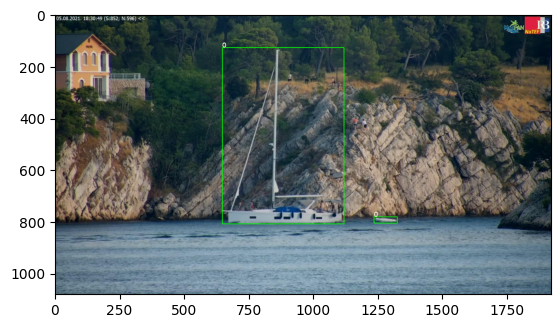

In [59]:
# choose a random image from the CombinedDatasetsChallenge folder and plot the bounding box
datafolder = os.path.join(os.getcwd(), 'data', 'SibenikDataset')
filename = random.choice(os.listdir(os.path.join(datafolder,  'images', 'train')))

print(filename)
image = cv2.imread(os.path.join(datafolder, 'images', 'train', filename))
labels = open(os.path.join(datafolder, 'labels', 'train', filename.split('.')[0]+".txt"), 'r').readlines()

for label in labels:
    label = label.strip()
    print(label)
    classLabel, x0, y0, x1, y1 = label.split(' ')[:5]
    x0, y0, x1, y1 = float(x0), float(y0), float(x1), float(y1)
    x0, y0, x1, y1 = x0*image.shape[1], y0*image.shape[0], x1*image.shape[1], y1*image.shape[0]

    box = np.array([x0-x1/2, y0-y1/2,x0+x1/2, y0+y1/2,], dtype = np.float32)
    box = box.round().astype(np.int32).tolist()
    image = plot_bbox(image, box, classLabel, show=False)
_=plot_bbox(image, box, classLabel)

In [36]:
len(os.listdir(os.path.join(os.getcwd(), 'data', 'SibenikDataset', 'images', 'train')))

2334